In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
titanic_df = pd.read_csv('train.csv')

# quick look at data!
titanic_df.info
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Sex', ylabel='count'>

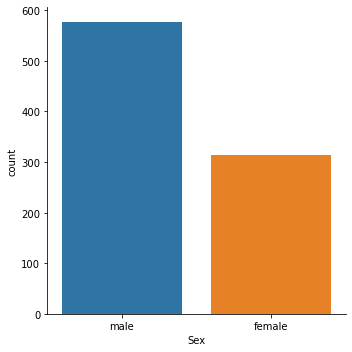

In [26]:
# who are the passengers on Titanic?
sns.catplot(x = 'Sex',data = titanic_df, kind = 'count')
sns.countplot(x = 'Sex',data = titanic_df,saturation = 0.8)

<AxesSubplot:xlabel='Sex', ylabel='count'>

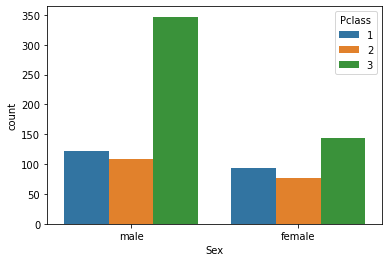

In [30]:
# making a countplot based on sex and hue based on passenger class
sns.countplot(x = 'Sex',data = titanic_df,hue = 'Pclass')

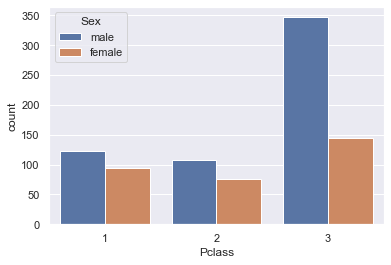

In [47]:
# countplot based on passenger class and hue based on sex
sns.countplot(x = 'Pclass',data = titanic_df,hue = 'Sex')
plt.savefig('pclass_sex.png')

In [32]:
# creating a function called male_female_child(a new object):
#    age,sex are columns from the dataset and assigning them to passenger

# if age is lower than 16:
# return 'child'
# anything else, return sex which is based on the original variable

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [34]:
# creating a new column(variable) called person
# making a list of Age and Sex and applying them to the function created above and placing the results on the column
# which is expressed in axis = 1 

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis = 1)

In [36]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


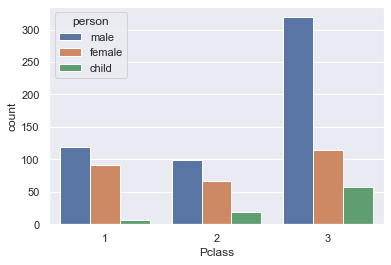

In [45]:
sns.countplot(x = 'Pclass',data = titanic_df,hue = 'person')
plt.savefig('pclass_person.png')

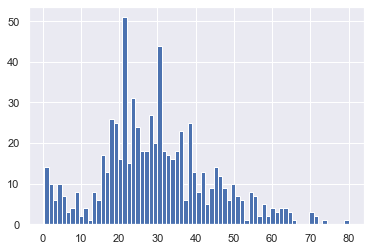

In [46]:
sns.set_theme()
titanic_df['Age'].hist(bins = 70)
plt.savefig('hist_age.png')

In [43]:
titanic_df['Age'].mean()

29.69911764705882

In [44]:
# value_counts is count function

titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64